In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from math import ceil, log, exp
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import math

tf.keras.utils.set_random_seed(seed=100) # for each run, make sure that the random seed is the same between runs

In [43]:
class AutoEncoder(tf.keras.Model):
    def __init__(self, x_train, x_test):
        super().__init__()
        self.encoder = self.encoder_model()
        self.decoder = self.decoder_model()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.train_data = x_train
        self.test_data = x_test

    def encoder_model(self):
        encoder_inputs = keras.Input(shape=(12)) # the shape is the number of dimensions and the length of data that will be put in. 
        # i.e. 6dims and 1 data points
        
        
        #encoded = layers.Dense(6, activation='sigmoid')(encoder_inputs)
        
        encoded = layers.Dense(9, activation='tanh')(encoder_inputs)
        #encoded = layers.Dense(5, activation='sigmoid')(encoded)
        
        encoded = layers.Dense(7, activation='tanh')(encoded)
        encoded = layers.Dense(5, activation='tanh')(encoded)
        #encoded = layers.Dense(4, activation='sigmoid')(encoded)
        
        #encoded = layers.Dense(3, activation='sigmoid')(encoded)
        
        latent_space = layers.Dense(3, activation='tanh')(encoded) # this is the latent space (the output of the encoder)
        
        encoder = keras.Model(encoder_inputs, latent_space) # this defines the model in the keras computational graph
        encoder.compile(optimizer='Adam', loss='mse') # the compile step of the keras model
        encoder.summary()
        return encoder # returns the compiled model
    
    def decoder_model(self):
        decoder_inputs = keras.Input(shape=(3)) # these are the inputs of the decoder (3dims (the latent space), 1 number of data points)
        #decoded = layers.Dense(3, activation='sigmoid')(decoder_inputs)
        
        decoded = layers.Dense(5, activation='tanh')(decoder_inputs)
        #decoded = layers.Dense(4, activation='tanh')(decoded)
    
        decoded = layers.Dense(7, activation='tanh')(decoded)
        
        decoded = layers.Dense(9, activation='tanh')(decoded)
        #decoded = layers.Dense(5, activation='sigmoid')(decoded)
        #decoded = layers.Dense(6, activation='sigmoid')(decoded)
        
        #decoded = layers.Dense(5, activation='tanh')(decoder_inputs)
        
        output_space = layers.Dense(12, activation='sigmoid')(decoded) # the output (decoded latent space, should be the inputs)
        
        decoder = keras.Model(decoder_inputs, output_space) # defining the decoder as a Model
        decoder.compile(optimizer='Adam', loss='mse') # compiling the model
        decoder.summary()
        return decoder # returning the compiled model
    
    
    
    def train_step(self, data): # as we have two parts of the model, we have to define how the model should be trained to access the latent space
        with tf.GradientTape() as tape:
            latent_output = self.encoder(data)
            reconstructed_data = self.decoder(latent_output)
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.mean_squared_logarithmic_error(data, reconstructed_data)))
            total_loss = reconstruction_loss
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        return {'total_loss': self.total_loss_tracker.result(),
                'reconstruction_loss': self.reconstruction_loss_tracker.result()}

In [44]:
# to import the data
x_data_raw = np.loadtxt('train4 .csv',delimiter = ',')

#fix this/make it clean if it works
#x_train = x_data[:ceil(0.8*len(x_data))]
#x_valid = x_data[ceil(0.6*len(x_data)):ceil(0.8*len(x_data)):1]


In [45]:
#normalise log data



import matplotlib.pyplot as plt


logdata = []
for i in range(0,len(x_data_raw)):  #seperates the 6th column 
    logdata.append(x_data_raw[i,5])

    
normal_log = np.log10(logdata)
    
x_axis = np.arange(1, len(x_data_raw)+1, 1)
    


In [1]:

#seperate frist 5 columns before applying mapping function
col1 = []
for i in range(0,len(x_data_raw)):  #seperates the 1 column 
    col1.append(x_data_raw[i,0])
    
col2 = []
for i in range(0,len(x_data_raw)):  #seperates the 2 column 
    col2.append(x_data_raw[i,1])
    
col3 = []
for i in range(0,len(x_data_raw)):  #seperates the 3 column 
    col3.append(x_data_raw[i,2])
    
col4 = []
for i in range(0,len(x_data_raw)):  #seperates the 4 column 
    col4.append(x_data_raw[i,3])
    
col5 = []
for i in range(0,len(x_data_raw)):  #seperates the 5 column 
    col5.append(x_data_raw[i,4])

def map_unique_values(arr):
    unique_values = list(set(arr))
    unique_values.sort() 
    value_to_number_mapping = {value: i + 1 for i, value in enumerate(unique_values)}
    mapped_array = [value_to_number_mapping[value] for value in arr]
    return mapped_array, value_to_number_mapping

# Map the values
col1_mapped, col1_mapping = map_unique_values(col1)
col2_mapped, col2_mapping = map_unique_values(col2)
col3_mapped, col3_mapping = map_unique_values(col3)
col4_mapped, col4_mapping = map_unique_values(col4)
col5_mapped, col5_mapping = map_unique_values(col5)

#error arises from same values being given particular values etc 1,2,3 given 5.6.7



def order_by_frequency(data):
    # Count the frequency of each value
    value_counts = {}
    for value in data:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1

    # Sort the values based on their frequency
    sorted_values = sorted(value_counts.keys(), key=lambda x: value_counts[x], reverse=False)

    # Create a mapping between values and their ranks
    rank_mapping = {value: rank for rank, value in enumerate(sorted_values, start=1)}

    # Rank the data
    ranked_data = [rank_mapping[value] for value in data]

    return ranked_data, rank_mapping




# Order the array by frequency
col1_ordered, rank_mapped1 = order_by_frequency(col1_mapped)
col2_ordered, rank_mapped2 = order_by_frequency(col2_mapped)
col3_ordered, rank_mapped3 = order_by_frequency(col3_mapped)
col4_ordered, rank_mapped4 = order_by_frequency(col4_mapped)
col5_ordered, rank_mapped5 = order_by_frequency(col5_mapped)





def min_max(array):
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    return normalized_array, min_val, max_val




col1_normalized, min_val1, max_val1 = min_max(col1_ordered)
col2_normalized, min_val2, max_val2 = min_max(col2_ordered)
col3_normalized, min_val3, max_val3 = min_max(col3_ordered)
col4_normalized, min_val4, max_val4 = min_max(col4_ordered)
col5_normalized, min_val5, max_val5 = min_max(col5_ordered)
col6_normalized, min_val6, max_val6 = min_max(normal_log)




x_data = np.column_stack((col1_normalized, col2_normalized, col3_normalized, col4_normalized, col5_normalized, col6_normalized))



print(np.shape(x_data))










visual = []
for i in range(0,len(x_data)):
    visual.append(x_data[i,0])


plt.hist(visual, bins=1000)
plt.show()

plt.hist(col1_ordered, bins=1000)
plt.show()



df = pd.DataFrame(col5, columns=['2'])
df.to_csv('col5_m') # this can be renamed



def duplicate_columns(array):
    duplicated_array = np.hstack((array, array))
    return duplicated_array


x_data = duplicate_columns(x_data)

print(np.shape(x_data))



NameError: name 'x_data_raw' is not defined

In [47]:

df = pd.DataFrame(x_data, columns=['1','2','3','4','5','6', '7','8','9','10','11','12'])
df.to_csv('x_data') # this can be renamed

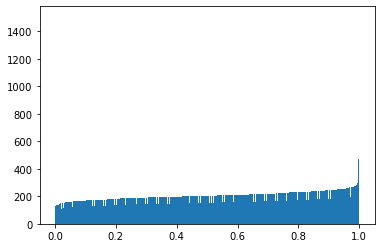

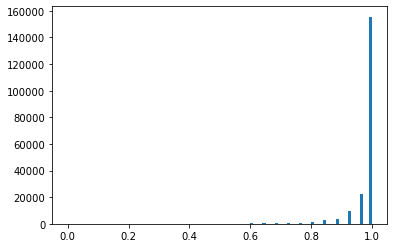

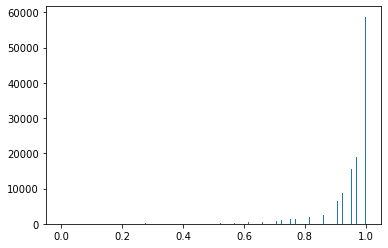

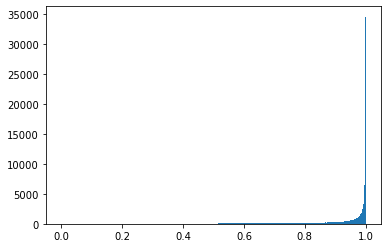

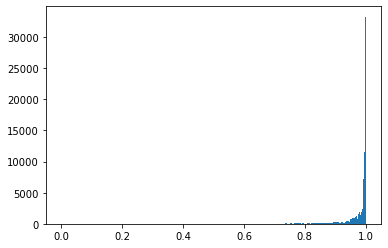

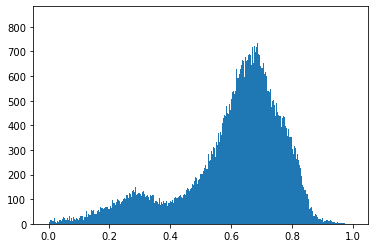

In [48]:
plt.hist(col1_normalized, bins = 1000)
plt.show()
plt.hist(col2_normalized, bins = 100)
plt.show()
plt.hist(col3_normalized, bins = 1000)
plt.show()
plt.hist(col4_normalized, bins = 1000)
plt.show()
plt.hist(col5_normalized, bins = 1000)
plt.show()
plt.hist(col6_normalized, bins = 1000)
plt.show()

In [49]:

x_train = x_data
x_test = x_data[ceil(0.8*len(x_data)):]

In [50]:
AutoEncoder = AutoEncoder(x_train, x_test)
AutoEncoder.compile(optimizer=keras.optimizers.Adam())
AutoEncoder.fit(x_train, epochs= 2000 , batch_size=200)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_20 (Dense)            (None, 9)                 117       
                                                                 
 dense_21 (Dense)            (None, 7)                 70        
                                                                 
 dense_22 (Dense)            (None, 5)                 40        
                                                                 
 dense_23 (Dense)            (None, 3)                 18        
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_7"
____

Epoch 50/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1376 - reconstruction_loss: 0.1376
Epoch 51/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1373 - reconstruction_loss: 0.1373
Epoch 52/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1369 - reconstruction_loss: 0.1369
Epoch 53/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1364 - reconstruction_loss: 0.1364
Epoch 54/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1361 - reconstruction_loss: 0.1361
Epoch 55/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1357 - reconstruction_loss: 0.1357
Epoch 56/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1355 - reconstruction_loss: 0.1355
Epoch 57/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1351 - reconstruction_loss: 0.1351
Epoch 58/2000
1000/1000 

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1252 - reconstruction_loss: 0.1252
Epoch 118/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1251 - reconstruction_loss: 0.1251
Epoch 119/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1249 - reconstruction_loss: 0.1249
Epoch 120/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1251 - reconstruction_loss: 0.1251
Epoch 121/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1248 - reconstruction_loss: 0.1248
Epoch 122/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1250 - reconstruction_loss: 0.1250
Epoch 123/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1247 - reconstruction_loss: 0.1247
Epoch 124/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1248 - reconstruction_loss: 0.1248
Epoch 125/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1209 - reconstruction_loss: 0.1209
Epoch 184/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1208 - reconstruction_loss: 0.1208
Epoch 185/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1208 - reconstruction_loss: 0.1208
Epoch 186/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1207 - reconstruction_loss: 0.1207
Epoch 187/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1208 - reconstruction_loss: 0.1208
Epoch 188/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1206 - reconstruction_loss: 0.1206
Epoch 189/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1207 - reconstruction_loss: 0.1207
Epoch 190/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1205 - reconstruction_loss: 0.1205
Epoch 191/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1168 - reconstruction_loss: 0.1168
Epoch 250/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1168 - reconstruction_loss: 0.1168
Epoch 251/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1166 - reconstruction_loss: 0.1166
Epoch 252/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1166 - reconstruction_loss: 0.1166
Epoch 253/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1166 - reconstruction_loss: 0.1166
Epoch 254/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1164 - reconstruction_loss: 0.1164
Epoch 255/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1164 - reconstruction_loss: 0.1164
Epoch 256/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1163 - reconstruction_loss: 0.1163
Epoch 257/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1118 - reconstruction_loss: 0.1118
Epoch 316/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1116 - reconstruction_loss: 0.1116
Epoch 317/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1115 - reconstruction_loss: 0.1115
Epoch 318/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1116 - reconstruction_loss: 0.1116
Epoch 319/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1113 - reconstruction_loss: 0.1113
Epoch 320/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1113 - reconstruction_loss: 0.1113
Epoch 321/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1114 - reconstruction_loss: 0.1114
Epoch 322/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1112 - reconstruction_loss: 0.1112
Epoch 323/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1077 - reconstruction_loss: 0.1077
Epoch 382/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1076 - reconstruction_loss: 0.1076
Epoch 383/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1076 - reconstruction_loss: 0.1076
Epoch 384/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1075 - reconstruction_loss: 0.1075
Epoch 385/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1074 - reconstruction_loss: 0.1074
Epoch 386/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1076 - reconstruction_loss: 0.1076
Epoch 387/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1072 - reconstruction_loss: 0.1072
Epoch 388/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1073 - reconstruction_loss: 0.1073
Epoch 389/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1050 - reconstruction_loss: 0.1050
Epoch 448/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1052 - reconstruction_loss: 0.1052
Epoch 449/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1050 - reconstruction_loss: 0.1050
Epoch 450/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1051 - reconstruction_loss: 0.1051
Epoch 451/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1051 - reconstruction_loss: 0.1051
Epoch 452/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1050 - reconstruction_loss: 0.1050
Epoch 453/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1051 - reconstruction_loss: 0.1051
Epoch 454/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1048 - reconstruction_loss: 0.1048
Epoch 455/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1033 - reconstruction_loss: 0.1033
Epoch 514/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1033 - reconstruction_loss: 0.1033
Epoch 515/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1034 - reconstruction_loss: 0.1034
Epoch 516/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1034 - reconstruction_loss: 0.1034
Epoch 517/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1033 - reconstruction_loss: 0.1033
Epoch 518/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1032 - reconstruction_loss: 0.1032
Epoch 519/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1032 - reconstruction_loss: 0.1032
Epoch 520/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1032 - reconstruction_loss: 0.1032
Epoch 521/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1018 - reconstruction_loss: 0.1018
Epoch 580/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1018 - reconstruction_loss: 0.1018
Epoch 581/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1017 - reconstruction_loss: 0.1017
Epoch 582/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1017 - reconstruction_loss: 0.1017
Epoch 583/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1018 - reconstruction_loss: 0.1018
Epoch 584/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1016 - reconstruction_loss: 0.1016
Epoch 585/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1017 - reconstruction_loss: 0.1017
Epoch 586/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1016 - reconstruction_loss: 0.1016
Epoch 587/2000
1000/1000 [=====

1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1003 - reconstruction_loss: 0.1003
Epoch 646/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1003 - reconstruction_loss: 0.1003
Epoch 647/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1003 - reconstruction_loss: 0.1003
Epoch 648/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1003 - reconstruction_loss: 0.1003
Epoch 649/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.1002 - reconstruction_loss: 0.1002
Epoch 650/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1001 - reconstruction_loss: 0.1001
Epoch 651/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1003 - reconstruction_loss: 0.1003
Epoch 652/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.1002 - reconstruction_loss: 0.1002
Epoch 653/2000
1000/1000 [=====

1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0993 - reconstruction_loss: 0.0993
Epoch 712/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0995 - reconstruction_loss: 0.0995
Epoch 713/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0993 - reconstruction_loss: 0.0993
Epoch 714/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0993 - reconstruction_loss: 0.0993
Epoch 715/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0992 - reconstruction_loss: 0.0992
Epoch 716/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0993 - reconstruction_loss: 0.0993
Epoch 717/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0992 - reconstruction_loss: 0.0992
Epoch 718/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0993 - reconstruction_loss: 0.0993
Epoch 719/2000
1000/1000 [=====

1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0985 - reconstruction_loss: 0.0985
Epoch 778/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0985 - reconstruction_loss: 0.0985
Epoch 779/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0983 - reconstruction_loss: 0.0983
Epoch 780/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0984 - reconstruction_loss: 0.0984
Epoch 781/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0983 - reconstruction_loss: 0.0983
Epoch 782/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0984 - reconstruction_loss: 0.0984
Epoch 783/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0983 - reconstruction_loss: 0.0983
Epoch 784/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0983 - reconstruction_loss: 0.0983
Epoch 785/2000
1000/1000 [=====

1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0973 - reconstruction_loss: 0.0973
Epoch 844/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0970 - reconstruction_loss: 0.0970
Epoch 845/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0973 - reconstruction_loss: 0.0973
Epoch 846/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0972 - reconstruction_loss: 0.0972
Epoch 847/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0971 - reconstruction_loss: 0.0971
Epoch 848/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0971 - reconstruction_loss: 0.0971
Epoch 849/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0972 - reconstruction_loss: 0.0972
Epoch 850/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0970 - reconstruction_loss: 0.0970
Epoch 851/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0954 - reconstruction_loss: 0.0954
Epoch 910/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0956 - reconstruction_loss: 0.0956
Epoch 911/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0953 - reconstruction_loss: 0.0953
Epoch 912/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0954 - reconstruction_loss: 0.0954
Epoch 913/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0953 - reconstruction_loss: 0.0953
Epoch 914/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0953 - reconstruction_loss: 0.0953
Epoch 915/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0954 - reconstruction_loss: 0.0954
Epoch 916/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0953 - reconstruction_loss: 0.0953
Epoch 917/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0935 - reconstruction_loss: 0.0935
Epoch 976/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0935 - reconstruction_loss: 0.0935
Epoch 977/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0934 - reconstruction_loss: 0.0934
Epoch 978/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0935 - reconstruction_loss: 0.0935
Epoch 979/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0933 - reconstruction_loss: 0.0933
Epoch 980/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0934 - reconstruction_loss: 0.0934
Epoch 981/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0933 - reconstruction_loss: 0.0933
Epoch 982/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0934 - reconstruction_loss: 0.0934
Epoch 983/2000
1000/1000 [=====

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0920 - reconstruction_loss: 0.0920
Epoch 1042/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0919 - reconstruction_loss: 0.0919
Epoch 1043/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0919 - reconstruction_loss: 0.0919
Epoch 1044/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0919 - reconstruction_loss: 0.0919
Epoch 1045/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0920 - reconstruction_loss: 0.0920
Epoch 1046/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0919 - reconstruction_loss: 0.0919
Epoch 1047/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0918 - reconstruction_loss: 0.0918
Epoch 1048/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0919 - reconstruction_loss: 0.0919
Epoch 1049/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0907 - reconstruction_loss: 0.0907
Epoch 1108/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0907 - reconstruction_loss: 0.0907
Epoch 1109/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0908 - reconstruction_loss: 0.0908
Epoch 1110/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0908 - reconstruction_loss: 0.0908
Epoch 1111/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0908 - reconstruction_loss: 0.0908
Epoch 1112/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0906 - reconstruction_loss: 0.0906
Epoch 1113/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0906 - reconstruction_loss: 0.0906
Epoch 1114/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0906 - reconstruction_loss: 0.0906
Epoch 1115/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0899 - reconstruction_loss: 0.0899
Epoch 1174/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0897 - reconstruction_loss: 0.0897
Epoch 1175/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0897 - reconstruction_loss: 0.0897
Epoch 1176/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0899 - reconstruction_loss: 0.0899
Epoch 1177/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0897 - reconstruction_loss: 0.0897
Epoch 1178/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0898 - reconstruction_loss: 0.0898
Epoch 1179/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0897 - reconstruction_loss: 0.0897
Epoch 1180/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0898 - reconstruction_loss: 0.0898
Epoch 1181/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0891 - reconstruction_loss: 0.0891
Epoch 1240/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0890 - reconstruction_loss: 0.0890
Epoch 1241/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0890 - reconstruction_loss: 0.0890
Epoch 1242/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0890 - reconstruction_loss: 0.0890
Epoch 1243/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0890 - reconstruction_loss: 0.0890
Epoch 1244/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0890 - reconstruction_loss: 0.0890
Epoch 1245/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0890 - reconstruction_loss: 0.0890
Epoch 1246/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0889 - reconstruction_loss: 0.0889
Epoch 1247/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0885 - reconstruction_loss: 0.0885
Epoch 1306/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0885 - reconstruction_loss: 0.0885
Epoch 1307/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0882 - reconstruction_loss: 0.0882
Epoch 1308/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0884 - reconstruction_loss: 0.0884
Epoch 1309/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0884 - reconstruction_loss: 0.0884
Epoch 1310/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0884 - reconstruction_loss: 0.0884
Epoch 1311/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0883 - reconstruction_loss: 0.0883
Epoch 1312/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0882 - reconstruction_loss: 0.0882
Epoch 1313/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0878 - reconstruction_loss: 0.0878
Epoch 1372/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0877 - reconstruction_loss: 0.0877
Epoch 1373/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0879 - reconstruction_loss: 0.0879
Epoch 1374/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0878 - reconstruction_loss: 0.0878
Epoch 1375/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0878 - reconstruction_loss: 0.0878
Epoch 1376/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0878 - reconstruction_loss: 0.0878
Epoch 1377/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0877 - reconstruction_loss: 0.0877
Epoch 1378/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0878 - reconstruction_loss: 0.0878
Epoch 1379/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0872 - reconstruction_loss: 0.0872
Epoch 1438/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0874 - reconstruction_loss: 0.0874
Epoch 1439/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0872 - reconstruction_loss: 0.0872
Epoch 1440/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0872 - reconstruction_loss: 0.0872
Epoch 1441/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0873 - reconstruction_loss: 0.0873
Epoch 1442/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0872 - reconstruction_loss: 0.0872
Epoch 1443/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0872 - reconstruction_loss: 0.0872
Epoch 1444/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0872 - reconstruction_loss: 0.0872
Epoch 1445/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1504/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1505/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1506/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1507/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1508/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0869 - reconstruction_loss: 0.0869
Epoch 1509/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1510/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0868 - reconstruction_loss: 0.0868
Epoch 1511/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0863 - reconstruction_loss: 0.0863
Epoch 1570/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0864 - reconstruction_loss: 0.0864
Epoch 1571/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0864 - reconstruction_loss: 0.0864
Epoch 1572/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0865 - reconstruction_loss: 0.0865
Epoch 1573/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0863 - reconstruction_loss: 0.0863
Epoch 1574/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0864 - reconstruction_loss: 0.0864
Epoch 1575/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0863 - reconstruction_loss: 0.0863
Epoch 1576/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0865 - reconstruction_loss: 0.0865
Epoch 1577/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0861 - reconstruction_loss: 0.0861
Epoch 1636/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0860 - reconstruction_loss: 0.0860
Epoch 1637/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0859 - reconstruction_loss: 0.0859
Epoch 1638/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0858 - reconstruction_loss: 0.0858
Epoch 1639/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0860 - reconstruction_loss: 0.0860
Epoch 1640/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0859 - reconstruction_loss: 0.0859
Epoch 1641/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0860 - reconstruction_loss: 0.0860
Epoch 1642/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0858 - reconstruction_loss: 0.0858
Epoch 1643/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0855 - reconstruction_loss: 0.0855
Epoch 1702/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0855 - reconstruction_loss: 0.0855
Epoch 1703/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0854 - reconstruction_loss: 0.0854
Epoch 1704/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0853 - reconstruction_loss: 0.0853
Epoch 1705/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0853 - reconstruction_loss: 0.0853
Epoch 1706/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0856 - reconstruction_loss: 0.0856
Epoch 1707/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0853 - reconstruction_loss: 0.0853
Epoch 1708/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0855 - reconstruction_loss: 0.0855
Epoch 1709/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0850 - reconstruction_loss: 0.0850
Epoch 1768/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0850 - reconstruction_loss: 0.0850
Epoch 1769/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0851 - reconstruction_loss: 0.0851
Epoch 1770/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0851 - reconstruction_loss: 0.0851
Epoch 1771/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0851 - reconstruction_loss: 0.0851
Epoch 1772/2000
1000/1000 [==============================] - 2s 2ms/step - total_loss: 0.0851 - reconstruction_loss: 0.0851
Epoch 1773/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0849 - reconstruction_loss: 0.0849
Epoch 1774/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0852 - reconstruction_loss: 0.0852
Epoch 1775/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0847 - reconstruction_loss: 0.0847
Epoch 1834/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0847 - reconstruction_loss: 0.0847
Epoch 1835/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0847 - reconstruction_loss: 0.0847
Epoch 1836/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0846 - reconstruction_loss: 0.0846
Epoch 1837/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0847 - reconstruction_loss: 0.0847
Epoch 1838/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0846 - reconstruction_loss: 0.0846
Epoch 1839/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0846 - reconstruction_loss: 0.0846
Epoch 1840/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0847 - reconstruction_loss: 0.0847
Epoch 1841/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0843 - reconstruction_loss: 0.0843
Epoch 1900/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0843 - reconstruction_loss: 0.0843
Epoch 1901/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0842 - reconstruction_loss: 0.0842
Epoch 1902/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0842 - reconstruction_loss: 0.0842
Epoch 1903/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0843 - reconstruction_loss: 0.0843
Epoch 1904/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0842 - reconstruction_loss: 0.0842
Epoch 1905/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0842 - reconstruction_loss: 0.0842
Epoch 1906/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0842 - reconstruction_loss: 0.0842
Epoch 1907/2000
1000/100

1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0837 - reconstruction_loss: 0.0837
Epoch 1966/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0838 - reconstruction_loss: 0.0838
Epoch 1967/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0838 - reconstruction_loss: 0.0838
Epoch 1968/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0836 - reconstruction_loss: 0.0836
Epoch 1969/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0839 - reconstruction_loss: 0.0839
Epoch 1970/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0839 - reconstruction_loss: 0.0839
Epoch 1971/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0837 - reconstruction_loss: 0.0837
Epoch 1972/2000
1000/1000 [==============================] - 1s 1ms/step - total_loss: 0.0839 - reconstruction_loss: 0.0839
Epoch 1973/2000
1000/100

In [51]:
latent_space_representation = AutoEncoder.encoder.predict(x_data)
Output_data = AutoEncoder.decoder.predict(latent_space_representation)

6250/6250 [==============================] - 6s 879us/step


In [179]:
def find_gradient_average2(x, y):
    """
    Function to find the gradient average of a set of data points.
    """
    gradients = []
    for i in range(x.shape[1]):
        # Perform linear regression to find the gradient
        A = np.vstack([x[:, i], np.ones(len(x[:, i]))]).T
        m, c = np.linalg.lstsq(A, y[:, i], rcond=None)[0]
        gradients.append(m)
        
    average_gradient = np.mean(gradients)
    
    return average_gradient, gradients

x = find_gradient_average2(x_data, Output_data)

print(x)

(0.9099511640074184, [0.9962925076462562, 0.8819574799982514, 0.8618946321599839, 0.9658034549549095, 0.8045144272387776, 0.9492445455036423, 0.9962924438826027, 0.8819574924946856, 0.8618946442158315, 0.96580347099607, 0.8045144450143092, 0.9492444239837025])


In [29]:
x = 0.985 + 0.79 + 0.736 + 0.95 + 0.65 + 0.89

In [54]:
print(latent_space_representation)
print(Output_data)

[[ 0.34792656 -0.49412608  0.0746159 ]
 [ 0.17979962 -0.38151583 -0.01649071]
 [ 0.25358662 -0.5196354   0.00320979]
 ...
 [ 0.2938095  -0.05996082  0.11598074]
 [ 0.22638308 -0.3063056   0.04142615]
 [ 0.28531846 -0.52791554  0.09191412]]
[[0.7292021  0.9981387  0.97407234 ... 0.9823728  0.98679286 0.6821527 ]
 [0.03211913 0.99926776 0.9693694  ... 0.8757308  0.97224575 0.73755354]
 [0.17190157 0.99488294 0.98462397 ... 0.9879687  0.989311   0.7567235 ]
 ...
 [0.9043427  0.99455047 0.9470534  ... 0.8174788  0.70665616 0.590979  ]
 [0.1749382  0.99983364 0.96673214 ... 0.8770632  0.974428   0.65069866]
 [0.42933697 0.99585646 0.9825276  ... 0.99322975 0.9918504  0.6217054 ]]


In [68]:
#save latent space data

df = pd.DataFrame(latent_space_representation, columns=['1', '2', '3'])
df.to_csv('latent_nonoise23') # this can be renamed

df = pd.DataFrame(Output_data, columns=['1','2','3','4','5','6'])
df.to_csv('Output_nonoise23') # this can be renamed

ValueError: Shape of passed values is (200000, 12), indices imply (200000, 6)

In [69]:
print(len(col1_ordered))
print(len(col_withoutnoise))

200000


NameError: name 'col_withoutnoise' is not defined

In [154]:
#calculating loss 

Reconstruction_loss = np.mean(np.square(x_train - Output_data), axis = 1)

Threshold = np.percentile(Reconstruction_loss, 99.0)
print(Threshold)


0.015587684488281229


[0.7292021  0.03211913 0.17190157 ... 0.9043427  0.1749382  0.42933697]


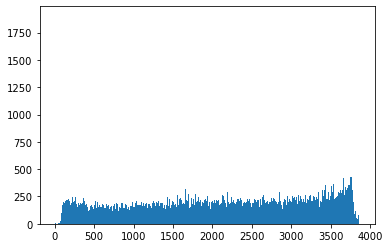

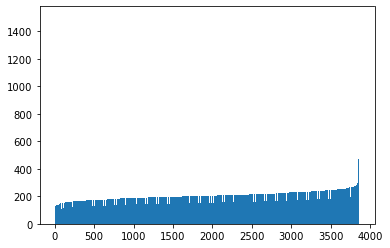

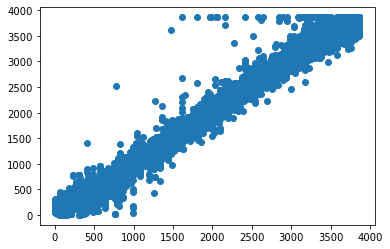

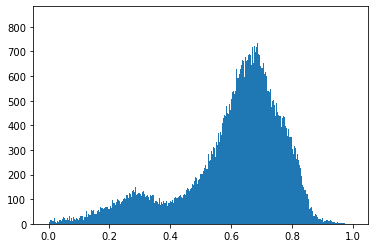

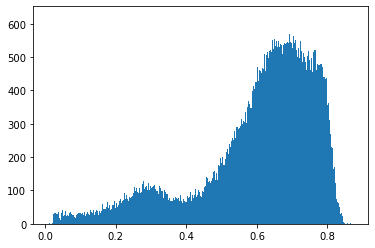

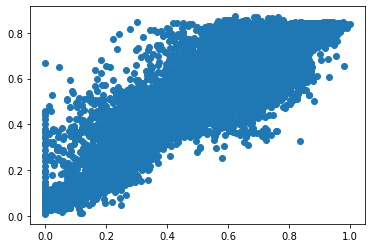

In [71]:
#map
#order
#noise
#min max
#const
#log
#min max

#missing applying min max inverse


#need to get out col1 output
col_out = Output_data[:, 0]
print(col_out)



#1
def inverse_min_max(normalized_array, min_val, max_val):
    return normalized_array * (max_val - min_val) + min_val

undo_normal1 = inverse_min_max(col_out, min_val1, max_val1)



#col_withoutnoise = undo_2normal - noise5
col_withoutnoise = undo_normal1


plt.hist(col_withoutnoise, bins=1000)
plt.show()


plt.hist(col1_ordered, bins=1000)
plt.show()




plt.scatter(col1_ordered, col_withoutnoise)
plt.show()


#always compare to col_ordered
#getting rid of noise not working yet




#plots x6
col6_out = Output_data[:, 5]

plt.hist(col6_normalized, bins=1000)
plt.show()
plt.hist(col6_out, bins=1000)
plt.show()

plt.scatter(col6_normalized, col6_out)
plt.show()

In [72]:
Testing_data = np.loadtxt('testing_data2.csv',delimiter = ',')

In [155]:
print(Testing_data)

col1_test = []
for i in range(0,len(Testing_data)):  #seperates the 1 column 
    col1_test.append(Testing_data[i,0])
    
col2_test = []
for i in range(0,len(Testing_data)):  #seperates the 2 column 
    col2_test.append(Testing_data[i,1])
    
col3_test = []
for i in range(0,len(Testing_data)):  #seperates the 3 column 
    col3_test.append(Testing_data[i,2])
    
col4_test = []
for i in range(0,len(Testing_data)):  #seperates the 4 column 
    col4_test.append(Testing_data[i,3])
    
col5_test = []
for i in range(0,len(Testing_data)):  #seperates the 5 column 
    col5_test.append(Testing_data[i,4])
    
logdata_test = []
for i in range(0,len(Testing_data)):  #seperates the 6th column 
    logdata_test.append(Testing_data[i,5])
    

    
normal_log_test = np.log10(logdata_test)
    
x_axis = np.arange(1, len(x_data_raw)+1, 1)



col1_mapped_test, col1_mapping = map_unique_values(col1_test)
col2_mapped_test, col2_mapping = map_unique_values(col2_test)
col3_mapped_test, col3_mapping = map_unique_values(col3_test)
col4_mapped_test, col4_mapping = map_unique_values(col4_test)
col5_mapped_test, col5_mapping = map_unique_values(col5_test)



col1_ordered_test, rank_mapped1 = order_by_frequency(col1_mapped_test)
col2_ordered_test, rank_mapped2 = order_by_frequency(col2_mapped_test)
col3_ordered_test, rank_mapped3 = order_by_frequency(col3_mapped_test)
col4_ordered_test, rank_mapped4 = order_by_frequency(col4_mapped_test)
col5_ordered_test, rank_mapped5 = order_by_frequency(col5_mapped_test)



col1_normalized_test, min_val1, max_val1 = min_max(col1_ordered_test)
col2_normalized_test, min_val2, max_val2 = min_max(col2_ordered_test)
col3_normalized_test, min_val3, max_val3 = min_max(col3_ordered_test)
col4_normalized_test, min_val4, max_val4 = min_max(col4_ordered_test)
col5_normalized_test, min_val5, max_val5 = min_max(col5_ordered_test)
col6_normalized_test, min_val6, max_val6 = min_max(normal_log_test)



Test_data = np.column_stack((col1_normalized_test, col2_normalized_test, col3_normalized_test, col4_normalized_test, col5_normalized_test, col6_normalized_test))

Test_data = duplicate_columns(Test_data)

latent_space_representation_test = AutoEncoder.encoder.predict(Test_data)

Output_data_test = AutoEncoder.decoder.predict(latent_space_representation_test)



Reconstruction_loss2 = np.mean(np.square(Test_data - Output_data_test), axis = 1)

print(Reconstruction_loss.shape)
#print(Reconstruction_loss)



[[1.640300e+04 1.399100e+04 2.600000e+01 2.364300e+05 3.700000e+01
  1.070440e+05]
 [2.062850e+05 1.399100e+04 2.600000e+01 1.689290e+05 4.900000e+01
  1.793140e+05]
 [1.906730e+05 1.399100e+04 4.600000e+01 2.456630e+05 5.392000e+03
  6.001100e+04]
 ...
 [1.508240e+05 1.399100e+04 2.600000e+01 7.985000e+03 3.700000e+01
  2.127980e+05]
 [2.061410e+05 3.241000e+03 6.700000e+01 9.163500e+04 5.200000e+01
  1.675439e+06]
 [2.009510e+05 3.241000e+03 6.700000e+01 9.163500e+04 5.200000e+01
  4.837820e+05]]
1563/1563 [==============================] - 1s 826us/step
(200000,)


In [156]:
#Threshold = np.percentile(Reconstruction_loss2, 99.0)
print(Threshold)

0.015587684488281229


In [157]:

anomaly_truth = Reconstruction_loss2 > Threshold

anomaly_indices = np.where(anomaly_truth)[0]

anomalies = Test_data[anomaly_truth]

print("Anomalies:")
print(anomalies)

print("Indices of anomalies in Test_data:")
print(anomaly_indices)

print("Number of anomalies:", len(anomalies))
#needs to track back to original ID
#how can i change this so that it gives me ID (perhaps the index number in array)


Anomalies:
[[0.59865355 0.44       0.6        ... 0.43977259 0.62717481 0.66665395]
 [0.89435526 1.         0.63076923 ... 0.4403648  0.93620547 0.58996734]
 [0.77187985 1.         0.52307692 ... 0.74002132 0.62800331 0.27588531]
 ...
 [0.31097877 1.         0.63076923 ... 0.43728533 0.9991715  0.73199517]
 [0.19756603 1.         0.63076923 ... 0.43740377 0.97100249 0.56515068]
 [0.96866908 0.84       0.89230769 ... 0.43799597 0.68185584 0.64271086]]
Indices of anomalies in Test_data:
[   33   100   124   125   190   231   252   348   435   504   556   693
   722   729   814   902   953  1043  1057  1110  1114  1186  1213  1241
  1351  1457  1605  1629  1662  1679  1728  1756  1811  1813  1993  1996
  2045  2127  2218  2276  2282  2283  2481  2517  2547  2621  2640  2702
  2764  2899  2915  2923  2924  3111  3192  3297  3600  3644  3676  3693
  3791  3792  3816  3865  3965  4020  4048  4096  4290  4465  4483  4550
  4620  4767  4779  4830  4887  4966  5036  5141  5217  5284  5336  5372

In [158]:
#Compare with George anomalies: 

df = pd.DataFrame(latent_space_representation, columns=['1', '2', '3'])
df.to_csv('anomaly_ID') # this can be renamed


In [159]:
df = pd.read_csv('George_Anomalies.csv')
George_IDs = df['id']
array_of_values = np.array(George_IDs, dtype=int)
print(array_of_values)




[  324   348   422   816  1186  1351  1497  1513  1532  2136  2364  2367
  2643  2743  2869  2923  3135  3373  3652  3720  3791  3792  3844  4002
  4087  4250  4336  4360  4741  4791  4853  4887  5008  5100  5314  5668
  5790  5798  5863  5969  5973  6062  6210  6218  6236  6264  6324  6397
  6508  6825  6831  6955  7037  7078  7094  7451  7496  7600  7627  7824
  7903  7968  8185  8248  8263  8421  8794  8988  9136  9152  9276  9314
  9325  9546  9593  9650  9847 10054 10077 10331 10347 10567 10643 10702
 10883 10935 10961 11130 11191 11198 11235 11558 11840 11948 11958 12036
 12486 12599 12700 12846 12946 13351 13388 13619 13717 13736 14036 14066
 14206 14558 14628 15318 15394 15676 15921 16204 16212 16226 16292 16350
 16615 16785 17279 17308 17646 17651 17879 17957 18618 18970 19007 19196
 19288 19302 19375 19408 19487 19505 20206 20366 20749 21072 21411 21467
 21508 21693 21830 22362 22553 22612 22757 22996 23351 23609 23731 23819
 23944 24077 24080 24418 24531 24598 24602 24865 24

In [232]:


# Calculate the intersection of the two arrays
intersection = np.intersect1d(George_IDs, anomaly_indices)

# Get the number of values shared
shared_count = len(intersection)

print("Number of shared values:", shared_count)

Number of shared values: 61


In [84]:
#need to preprocess, x_train and x_test
#need to train the auto encoder with x_train
#need to use x_test preprocessed
#need to reverse x_test preprocessed output
#need to compare to original x_test

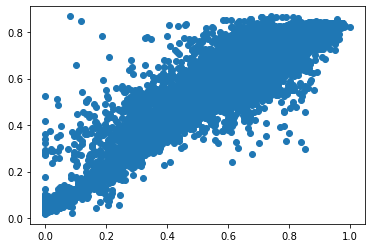

In [85]:
#need to preprocess code after training test split (if I have test data then no need for split? )


plt.scatter(col6_normalized_test, Output_data_test[:,5])

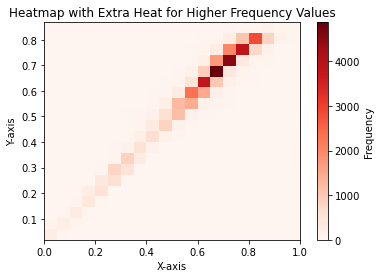

In [86]:

import numpy as np
import matplotlib.pyplot as plt

def generate_heatmap_2d(x, y):
    # Create a 2D histogram
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)  # Adjust bins as needed
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Plot the heatmap
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Reds')
    plt.colorbar(label='Frequency')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Heatmap with Extra Heat for Higher Frequency Values')
    plt.show()

# Example data (replace with your own data)
x = np.random.randn(1000)  # Example random data for x-axis
y = np.random.randn(1000)  # Example random data for y-axis

generate_heatmap_2d(col6_normalized_test, Output_data_test[:,5])

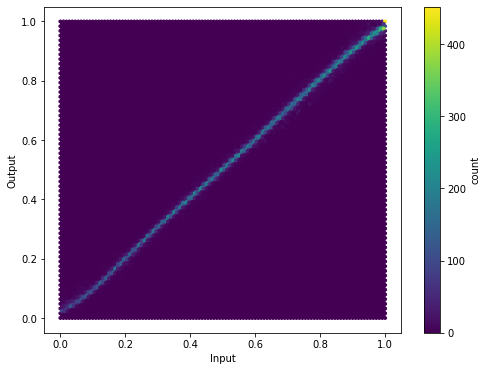

In [97]:
import matplotlib.pyplot as plt

def plot_hexbin(x, y, xlabel="", ylabel="", title="", gridsize=110, cmap='viridis', colorbar=True, alpha = 100):
    """
    Function to create a hexbin plot using Matplotlib.
    
    Parameters:
        x (array-like): x-coordinates of the data points.
        y (array-like): y-coordinates of the data points.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title for the plot.
        gridsize (int): Number of hexagons in the x-direction.
        cmap (str or Colormap): Colormap for the hexbin plot.
        colorbar (bool): Whether to display the colorbar.
    """
    plt.figure(figsize=(8, 6))
    plt.hexbin(x, y, gridsize=gridsize, cmap=cmap)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if colorbar:
        plt.colorbar(label='count')
    plt.show()

# Example usage:
import numpy as np

# Generate some random data
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)

# Plotting
plot_hexbin(Test_data[:,6], Output_data_test[:,6], xlabel='Input', ylabel='Output', title='')

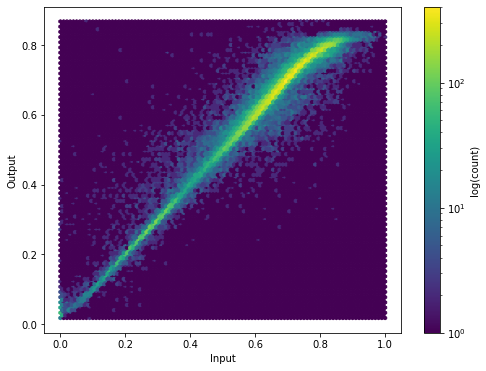

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_hexbin_log_frequency(x, y, xlabel="", ylabel="", title="", gridsize=100, cmap='viridis', colorbar=True, alpha = 1000):
    """
    Function to create a hexbin plot with log-scaled frequency using Matplotlib.
    """
    plt.figure(figsize=(8, 6))
    hb = plt.hexbin(x, y, gridsize=gridsize, cmap=cmap, norm=mcolors.LogNorm())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    if colorbar:
        plt.colorbar(hb, label='log(count)')
    plt.show()

# Example usage:
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)

plot_hexbin_log_frequency(Test_data[:,11], Output_data_test[:,11] , xlabel='Input', ylabel='Output', title='')

In [117]:
#find y = x

import numpy as np

def find_y_equals_x_average(x, y):
    """
    Function to find the y=x average of a set of data points.
    """
    # Calculate the mean of y - x
    y_minus_x = y - x
    y_equals_x_average = np.mean(y_minus_x)
    
    return y_equals_x_average

def find_gradient_average(x, y):
    """
    Function to find the gradient average of a set of data points.
    """
    # Perform linear regression to find the gradient
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    
    return m
import numpy as np

def find_gradient_average2(x, y):
    """
    Function to find the gradient average of a set of data points.
    """
    gradients = []
    for i in range(x.shape[1]):
        # Perform linear regression to find the gradient
        A = np.vstack([x[:, i], np.ones(len(x[:, i]))]).T
        m, c = np.linalg.lstsq(A, y[:, i], rcond=None)[0]
        gradients.append(m)
        
    average_gradient = np.mean(gradients)
    
    return average_gradient, gradients

# Example usage:
# Sample data points
x_values = Test_data
y_values = Output_data_test

# Find y=x average
y_equals_x_avg = find_y_equals_x_average(x_values, y_values)
print("y=x Average:", y_equals_x_avg)

# Find gradient average
gradient_avg = find_gradient_average2(x_values , y_values)
print("Gradient Average:", gradient_avg)
    

y=x Average: 0.0008352164787707351
Gradient Average: (0.9065360494053114, [0.9942983455523804, 0.8701066939942309, 0.8393163279099176, 0.9687030912036647, 0.8350077711243965, 0.9317841273951046, 0.9942982826817843, 0.8701067032532757, 0.8393163402818435, 0.9687031141636533, 0.8350077921518505, 0.9317840031516337])


In [177]:
#messing with bias from georges 

Reconstruction_loss3 = np.mean(np.square(Testing_data), axis = 1)

Threshold2 = np.percentile(Reconstruction_loss3, 99.0)

anomaly_truth2 = Reconstruction_loss3 > Threshold2

anomaly_indices2 = np.where(anomaly_truth2)[0]

anomalies2 = Test_data[anomaly_truth2]

print("Anomalies:")
print(anomalies2)

print("Indices of anomalies in Test_data:")
print(anomaly_indices2)

print("Number of anomalies:", len(anomalies2))
#needs to track back to original ID
#how can i change this so that it gives me ID (perhaps the index number in array)





Anomalies:
[[0.38891766 0.96       0.83076923 ... 0.64064906 0.98177299 0.87551477]
 [0.1941999  1.         1.         ... 0.86888547 0.9958575  0.87242496]
 [0.39150699 1.         0.87692308 ... 0.99028781 0.94780447 0.91507156]
 ...
 [0.33790782 1.         0.87692308 ... 0.89695606 0.95111848 0.92698716]
 [0.59269808 1.         1.         ... 0.9985787  0.998343   0.88399467]
 [0.14008286 1.         0.83076923 ... 0.99005093 0.991715   0.88156229]]
Indices of anomalies in Test_data:
[  492   495   552   615   691   734   780   825   866   873   881   965
  1034  1061  1147  1237  1239  1271  1276  1289  1439  1442  1700  2084
  2217  2305  2460  2571  2663  2738  2806  2810  2830  2919  3024  3373
  3396  3531  3635  3652  3659  3661  3688  3791  3844  3855  3928  3957
  4030  4360  4448  4609  4858  4887  4889  4927  5092  5230  5246  5314
  5350  5410  5447  5520  5583  5782  5791  5867  6032  6033  6062  6163
  6217  6218  6355  6356  6397  6433  6508  6516  6534  6570  6572  6603

In [234]:
#Calculate the intersection of the two arrays
intersection2 = np.intersect1d(George_IDs, anomaly_indices)

#Get the number of values shared
shared_count = len(intersection2)

print("Number of shared values of George with large data points:", shared_count)

Number of shared values of George with large data points: 61


In [173]:


# Calculate the intersection of the two arrays
intersection = np.intersect1d(intersection, anomaly_indices)

# Get the number of values shared
shared_count = len(intersection)

print("Number of shared values of mine with George Bias:", shared_count)

Number of shared values of mine with George Bias: 44


In [235]:
import pickle

# Load the NumPy array from the file
with open('intersection.pkl', 'rb') as f:
    intersection = pickle.load(f)

# Now 'shared_array' contains the NumPy array shared from the first notebook
print(intersection)

[  348  1186  2923  3652  3792  4336  4887  5668  5790  6264  7824  7968
  8248  8988  9650 10643 11198 11840 12486 12599 12946 16615 17279 17646
 17879 18618 19375 19487 20749 22362 22553 23944 24080 24927 25568 26366
 26742 27032 28170 28360 29216 29334 30014 31302 31694 32385 32896 33274
 34568 36047 36534 36653 36981 38062 38616 39088 40061 41420 41573 41719
 42069 42140 43976 44987 45663 47613 47904 48525 49163 49686]


In [236]:
# Calculate the intersection of the two arrays
intersection3 = np.intersect1d(intersection, intersection2)

# Get the number of values shared
shared_count = len(intersection3)

print("Number of shared values of mine with George Bias:", shared_count)

Number of shared values of mine with George Bias: 40


In [237]:
# Load the NumPy array from the file
with open('anomaly_indices.pkl', 'rb') as f:
    anomaly_indices_single = pickle.load(f)



[   33    80   111   155   190   231   252   292   348   435   556   722
   729   953  1043  1110  1186  1213  1241  1265  1269  1318  1334  1433
  1457  1517  1605  1629  1662  1735  1739  1813  1819  1907  1913  1993
  2045  2276  2283  2517  2621  2640  2712  2915  2923  2924  2937  3111
  3192  3297  3319  3328  3438  3466  3600  3640  3644  3652  3727  3786
  3792  3816  4020  4281  4290  4336  4359  4409  4483  4550  4641  4779
  4830  4887  5077  5105  5217  5258  5284  5353  5372  5622  5668  5790
  5873  5921  6033  6068  6103  6114  6222  6264  6327  6344  6387  6451
  6466  6476  6522  6718  6776  6829  6924  7093  7214  7296  7298  7479
  7490  7495  7501  7573  7661  7737  7768  7805  7824  7868  7968  8015
  8139  8248  8356  8423  8452  8479  8483  8514  8527  8596  8673  8708
  8988  9006  9052  9071  9207  9215  9260  9285  9286  9428  9430  9580
  9650  9781  9807  9885  9911  9987 10160 10209 10363 10382 10455 10516
 10531 10643 10735 10811 11110 11198 11212 11336 11

In [239]:
intersection4 = np.intersect1d(anomaly_indices, anomaly_indices_single)

# Get the number of values shared
shared_count = len(intersection4)

print(shared_count)

348
